In [1]:
import os
import sys

In [2]:
from maquinas.contextfree.cfg import ContextFreeGrammar as CFG
from maquinas.parser.earley_parser import print_chart, chart2table

In [3]:
gato=CFG('S->V; V-> vN; V -> vNP; N -> a; N -> N P ; P -> c')
print(gato.summary())

No terminal : N, S, V, P
Terminals   : a, v, c
Start       : S
Productions :
 S → V
 V → vN | vNP
 N → a | NP
 P → c


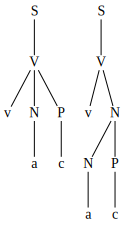

In [4]:
roots,chart,forest=gato.parse('vac')
gato.graph_trees(gato.extract_trees(forest))

In [5]:
re=CFG('E-> T; E -> E "+" T; T -> F; T -> TF ; F -> B; F -> F* ; F -> "(" E ")"; B-> a; B -> b; B -> "ϵ"; B -> "∅"')
print(re.summary())

No terminal : F, E, B, T
Terminals   : b, (, ϵ, +, ), a, ∅, *
Start       : E
Productions :
 E → T | E+T
 T → F | TF
 F → B | F* | (E)
 B → a | b | ϵ | ∅


In [6]:
roots,chart,forest=re.parse('(a*ba*ba*)*')
trees=list(re.extract_trees(forest))
for i,step in enumerate(re.derivation(trees[0])):
    if not i:
        print("".join(step),end="")
    else:
        print(" ⇒ ","".join(step),end="\n ")

E ⇒  T
  ⇒  F
  ⇒  F*
  ⇒  (E)*
  ⇒  (E)*
  ⇒  (T)*
  ⇒  (TF)*
  ⇒  (TFF)*
  ⇒  (TFFF)*
  ⇒  (TFFFF)*
  ⇒  (FFFFF)*
  ⇒  (F*FFFF)*
  ⇒  (B*FFFF)*
  ⇒  (a*FFFF)*
  ⇒  (a*FFFF)*
  ⇒  (a*FFFF)*
  ⇒  (a*BFFF)*
  ⇒  (a*bFFF)*
  ⇒  (a*bFFF)*
  ⇒  (a*bF*FF)*
  ⇒  (a*bB*FF)*
  ⇒  (a*ba*FF)*
  ⇒  (a*ba*FF)*
  ⇒  (a*ba*FF)*
  ⇒  (a*ba*BF)*
  ⇒  (a*ba*bF)*
  ⇒  (a*ba*bF)*
  ⇒  (a*ba*bF*)*
  ⇒  (a*ba*bB*)*
  ⇒  (a*ba*ba*)*
  ⇒  (a*ba*ba*)*
  ⇒  (a*ba*ba*)*
  ⇒  (a*ba*ba*)*
  ⇒  (a*ba*ba*)*
 

In [7]:
re.save_trees_img(trees,filename='arboles_re')

In [8]:
ambigua=CFG('S -> X; S -> R; X-> YZ; Y -> aYb; Y-> epsilon;  Z -> cZd; Z -> epsilon; R -> aRd; R -> T; T ->bTc ; T -> epsilon')
print(ambigua.summary())

No terminal : T, Y, S, Z, X, R
Terminals   : b, a, c, d
Start       : S
Productions :
 S → X | R
 X → YZ
 Y → aYb | ε
 Z → cZd | ε
 R → aRd | T
 T → bTc | ε


In [9]:
roots,chart,forest=ambigua.parse('aabbcd')
trees=list(ambigua.extract_trees(forest))
for i,step in enumerate(ambigua.derivation(trees[0])):
    if not i:
        print("".join(step),end="")
    else:
        print(" ⇒ ","".join(step),end="\n ")

S ⇒  X
  ⇒  YZ
  ⇒  aYbZ
  ⇒  aYbZ
  ⇒  aaYbbZ
  ⇒  aaYbbZ
  ⇒  aaεbbZ
  ⇒  aaεbbZ
  ⇒  aaεbbZ
  ⇒  aaεbbZ
  ⇒  aaεbbcZd
  ⇒  aaεbbcZd
  ⇒  aaεbbcεd
  ⇒  aaεbbcεd
  ⇒  aaεbbcεd
 

In [10]:
ambigua.save_trees_img(trees,filename='aabbcd')

In [11]:
roots,chart,forest=ambigua.parse('aabcdd')
trees=list(ambigua.extract_trees(forest))
for i,step in enumerate(ambigua.derivation(trees[0])):
    if not i:
        print("".join(step),end="")
    else:
        print(" ⇒ ","".join(step),end="\n ")

S ⇒  R
  ⇒  aRd
  ⇒  aRd
  ⇒  aaRdd
  ⇒  aaRdd
  ⇒  aaTdd
  ⇒  aabTcdd
  ⇒  aabTcdd
  ⇒  aabεcdd
  ⇒  aabεcdd
  ⇒  aabεcdd
  ⇒  aabεcdd
  ⇒  aabεcdd
 

In [12]:
ambigua.save_trees_img(trees,filename='aabcdd')

In [13]:
roots,chart,forest=ambigua.parse('aabbccdd')
trees=list(ambigua.extract_trees(forest))
for i,step in enumerate(ambigua.derivation(trees[0])):
    if not i:
        print("".join(step),end="")
    else:
        print(" ⇒ ","".join(step),end="\n ")

S ⇒  R
  ⇒  aRd
  ⇒  aRd
  ⇒  aaRdd
  ⇒  aaRdd
  ⇒  aaTdd
  ⇒  aabTcdd
  ⇒  aabTcdd
  ⇒  aabbTccdd
  ⇒  aabbTccdd
  ⇒  aabbεccdd
  ⇒  aabbεccdd
  ⇒  aabbεccdd
  ⇒  aabbεccdd
  ⇒  aabbεccdd
  ⇒  aabbεccdd
 

In [14]:
ambigua.save_trees_img(trees,filename='aabbccdd')

In [15]:
from maquinas.contextfree.pda import PushDownAutomaton as PDA
from maquinas.simulation import Simulation

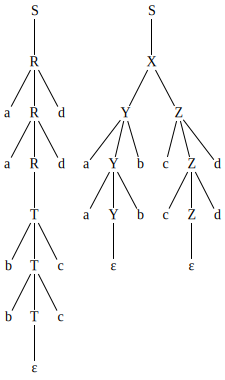

In [17]:
re.graph_trees(trees,filename='arboles_re')

In [18]:
# Ejercicio uno
wwʳ=PDA(Q=['q_0','q_1','q_2'],
         sigma=['a','b'],
         gamma=['A','B'],
         q_0='q_0',
         A=['q_2'],
         delta=[
            (('q_0','a','Z0'),[('q_0','AZ0')]),
            (('q_0','a','A'),[('q_0','AA')]),
            (('q_0','a','B'),[('q_0','AB')]),
            (('q_0','b','Z0'),[('q_0','BZ0')]),
            (('q_0','b','A'),[('q_0','BA')]),
            (('q_0','b','B'),[('q_0','BB')]),
            (('q_0','epsilon','Z0'),[('q_1','Z0')]), 
            (('q_0','epsilon','A'),[('q_1','A')]),
            (('q_0','epsilon','B'),[('q_1','B')]),
            (('q_1','a','A'),[('q_1','epsilon')]),
            (('q_1','b','B'),[('q_1','epsilon')]),
            (('q_1','epsilon','Z0'),[('q_2','Z0')]),
         ]
    )

In [19]:
for q,a,w_ in wwʳ.delta_stepwise("abbbba"):
    if a:
        print(f"{a} -> {wwʳ.states2string(q)}", end=",\n ")
    else:
        print(f"{wwʳ.states2string(q)}",end="\n ")
    res=q
    
print(f"\nCon {wwʳ.states2string(res)} Se acepta?", "Sí" if wwʳ.accept(res) else "No" )

q_0, Z₀]
 a -> q_0, AZ₀] | q_1, AZ₀],
 b -> q_0, BAZ₀] | q_1, BAZ₀],
 b -> q_0, BBAZ₀] | q_1, AZ₀] | q_1, BBAZ₀],
 b -> q_0, BBBAZ₀] | q_1, BAZ₀] | q_1, BBBAZ₀],
 b -> q_0, BBBBAZ₀] | q_1, AZ₀] | q_1, BBAZ₀] | q_1, BBBBAZ₀],
 a -> q_0, ABBBBAZ₀] | q_1, Z₀],
 ε -> q_1, ABBBBAZ₀] | q_2, Z₀],
 
Con q_1, ABBBBAZ₀] | q_2, Z₀] Se acepta? Sí


In [20]:
wwʳ.save_img('wwr')

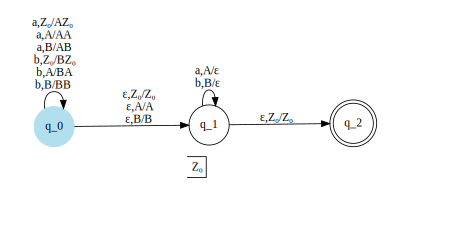

In [21]:
wwʳ.save_gif("abbbba",filename="wwr.gif",show=False)
wwʳ.graph()

In [22]:
# Ejercicio dos
wcwʳ=PDA(Q=['q_0','q_1','q_2'],
         sigma=['a','b','c'],
         gamma=['A','B'],
         q_0='q_0',
         A=['q_2'],
         delta=[
            (('q_0','a','Z0'),[('q_0','AZ0')]),
            (('q_0','a','A'),[('q_0','AA')]),
            (('q_0','a','B'),[('q_0','AB')]),
            (('q_0','b','Z0'),[('q_0','BZ0')]),
            (('q_0','b','A'),[('q_0','BA')]),
            (('q_0','b','B'),[('q_0','BB')]),
            (('q_0','c','Z0'),[('q_1','Z0')]), 
            (('q_0','c','A'),[('q_1','A')]),
            (('q_0','c','B'),[('q_1','B')]),
            (('q_1','a','A'),[('q_1','epsilon')]),
            (('q_1','b','B'),[('q_1','epsilon')]),
            (('q_1','epsilon','Z0'),[('q_2','Z0')]),
         ]
    )

In [23]:
for q,a,w_ in wcwʳ.delta_stepwise("abbcbba"):
    if a:
        print(f"{a} -> {wcwʳ.states2string(q)}", end=",\n ")
    else:
        print(f"{wcwʳ.states2string(q)}",end="\n ")
    res=q
    
print(f"\nCon {wcwʳ.states2string(res)} Se acepta?", "Sí" if wwʳ.accept(res) else "No" )

q_0, Z₀]
 a -> q_0, AZ₀],
 b -> q_0, BAZ₀],
 b -> q_0, BBAZ₀],
 c -> q_1, BBAZ₀],
 b -> q_1, BAZ₀],
 b -> q_1, AZ₀],
 a -> q_1, Z₀],
 ε -> q_2, Z₀],
 
Con q_2, Z₀] Se acepta? Sí


In [24]:
wcwʳ.save_img('wcwr')
wcwʳ.save_gif("abbcbba",filename="wcwr.gif",show=False)

In [25]:
# Ejercicio tres
bn1an_one=PDA(Q=['q_0','q_1','q_2','q_3'],
         sigma=['a','b',],
         gamma=['B'],
         q_0='q_0',
         A=['q_3'],
         delta=[
            (('q_0','b','Z0'),[('q_1','Z0')]),
            (('q_1','b','Z0'),[('q_1','BZ0')]),
            (('q_1','b','B'),[('q_1','BB')]),
            (('q_1','a','B'),[('q_2','epsilon')]),
            (('q_2','a','B'),[('q_2','epsilon')]), 
            (('q_2','epsilon','Z0'),[('q_3','Z0')]),
         ]
    )

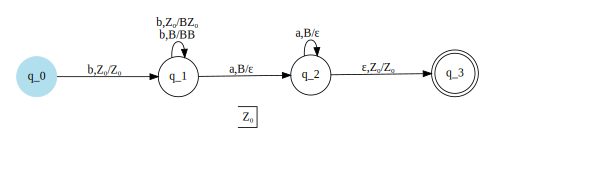

In [26]:
bn1an_one.save_img('bn1an_one')
bn1an_one.save_gif("bbbbaaa",filename="bn1an_one.gif",show=False)
bn1an_one.graph()

In [27]:
bn1an_two=PDA(Q=['q_0','q_1','q_2'],
         sigma=['a','b',],
         gamma=['B'],
         q_0='q_0',
         A=['q_2'],
         delta=[
            (('q_0','b','Z0'),[('q_0','BZ0')]),
            (('q_0','b','B'),[('q_0','BB')]),
            (('q_0','b','B'),[('q_1','B')]),
            (('q_0','b','Z0'),[('q_1','Z0')]),
            (('q_1','a','B'),[('q_1','epsilon')]), 
            (('q_1','epsilon','Z0'),[('q_2','Z0')]),
         ]
    )

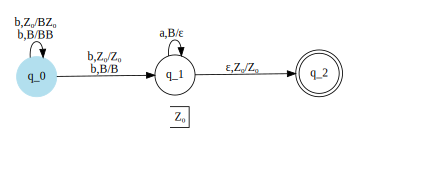

In [28]:
bn1an_two.save_img('bn1an_two')
bn1an_two.save_gif("bbbbaaa",filename="bn1an_two.gif",show=False)
bn1an_two.graph()

In [29]:
bn1an_three=PDA(Q=['q_0','q_1','q_2','q_3'],
         sigma=['a','b',],
         gamma=['B'],
         q_0='q_0',
         A=['q_3'],
         delta=[
            (('q_0','b','Z0'),[('q_0','BZ0')]),
            (('q_0','b','B'),[('q_0','BB')]),
            (('q_0','a','B'),[('q_1','epsilon')]),
            (('q_1','a','B'),[('q_1','epsilon')]),
            (('q_1','epsilon','B'),[('q_2','epsilon')]), 
            (('q_2','epsilon','Z0'),[('q_3','Z0')]),
         ]
    )

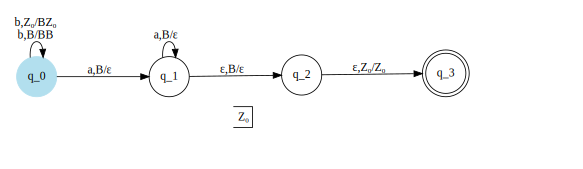

In [30]:
bn1an_three.save_img('bn1an_three')
bn1an_three.save_gif("bbbbaaa",filename="bn1an_three.gif",show=False)
bn1an_three.graph()

In [31]:
# Ejercicio dos
samecthanaplusb=PDA(Q=['q_0','q_1'],
         sigma=['a','b','c'],
         gamma=['A','C'],
         q_0='q_0',
         A=['q_1'],
         delta=[
            (('q_0','a','Z0'),[('q_0','CZ0')]),
            (('q_0','a','C'),[('q_0','CC')]),
            (('q_0','a','A'),[('q_0','epsilon')]),
            (('q_0','b','Z0'),[('q_0','CZ0')]),
            (('q_0','b','C'),[('q_0','CC')]),
            (('q_0','b','A'),[('q_0','epsilon')]),
            (('q_0','c','Z0'),[('q_0','AZ0')]),
            (('q_0','c','A'),[('q_0','AA')]),
            (('q_0','c','C'),[('q_0','epsilon')]),
            (('q_0','epsilon','Z0'),[('q_1','Z0')]),
         ]
    )

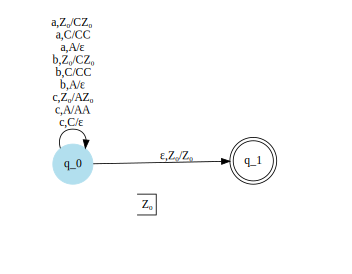

In [32]:
samecthanaplusb.save_img('samecthanaplusb')
samecthanaplusb.save_gif("caccbaaaacaccc",filename="samecthanaplusb.gif",show=False)
samecthanaplusb.graph()

In [33]:
aibj3=PDA(Q=['q_0','q_1','q_2'],
         sigma=['a','b',],
         gamma=['1','2','0'],
         q_0='q_0',
         A=['q_2'],
         delta=[
            (('q_0','a','Z0'),[('q_0','1Z0')]),
            (('q_0','a','1'),[('q_0','2')]),
            (('q_0','a','2'),[('q_0','epsilon')]),
            (('q_0','epsilon','Z0'),[('q_1','Z0')]), 
            (('q_0','b','Z0'),[('q_1','1Z0')]),
            (('q_0','b','1'),[('q_1','2')]),
            (('q_0','b','2'),[('q_1','epsilon')]),
            (('q_1','b','Z0'),[('q_1','1Z0')]),
            (('q_1','b','1'),[('q_1','2')]),
            (('q_1','b','2'),[('q_1','epsilon')]), 
            (('q_1','epsilon','Z0'),[('q_2','Z0')]),
         ]
    )

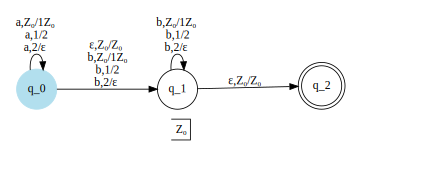

In [34]:
aibj3.save_img('aibj3')
aibj3.save_gif("aaaabb",filename="aibj3.gif",show=False)
aibj3.graph()

In [35]:
aibj3_two=PDA(Q=['q_0','q_1','q_2','q_0_','q_1_','q_2_'],
         sigma=['a','b',],
         gamma=['1','2','0'],
         q_0='q_0',
         A=['q_0','q_0_'],
         delta=[
            (('q_0','a','Z0'),[('q_1','Z0')]),
            (('q_1','a','Z0'),[('q_2','Z0')]),
            (('q_2','a','Z0'),[('q_0','Z0')]),
            (('q_0','b','Z0'),[('q_1_','Z0')]),
            (('q_1','b','Z0'),[('q_2_','Z0')]),
            (('q_2','b','Z0'),[('q_0_','Z0')]),
            (('q_0_','b','Z0'),[('q_1_','Z0')]),
            (('q_1_','b','Z0'),[('q_2_','Z0')]),
            (('q_2_','b','Z0'),[('q_0_','Z0')]),
         ]
    )

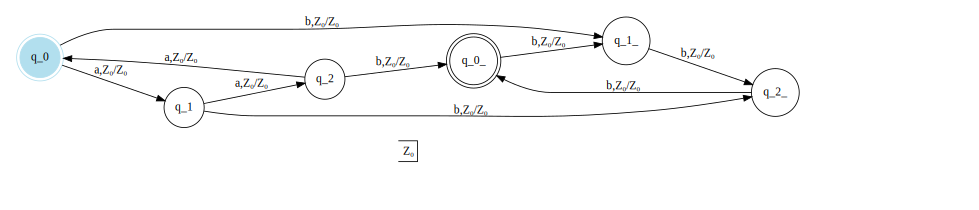

In [36]:
aibj3_two.save_img('aibj3_two')
aibj3_two.save_gif("aaaabb",filename="aibj3_two.gif",show=False)
aibj3_two.graph()

In [37]:
aibj3_three=PDA(Q=['q_0','q_1','q_2','q_3','q_4'],
         sigma=['a','b',],
         gamma=['I'],
         q_0='q_0',
         A=['q_4'],
         delta=[
            (('q_0','a','Z0'),[('q_0','IZ0')]),
            (('q_0','a','I'),[('q_0','II')]),
            (('q_0','b','Z0'),[('q_1','IZ0')]),
            (('q_0','b','I'),[('q_1','II')]),
            (('q_1','b','I'),[('q_1','II')]),             
            (('q_1','epsilon','I'),[('q_2','epsilon')]),
            (('q_2','epsilon','I'),[('q_3','epsilon')]),
            (('q_3','epsilon','I'),[('q_1','epsilon')]),
            (('q_1','epsilon','Z0'),[('q_4','Z0')]),
         ]
    )

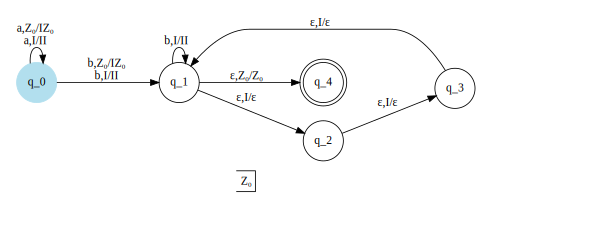

In [38]:
aibj3_three.save_img('aibj3_three')
aibj3_three.save_gif("aaaabb",filename="aibj3_three.gif",show=False)
aibj3_three.graph()

In [39]:
aibj3_four=PDA(Q=['q_0','q_1','q_2','q_3'],
         sigma=['a','b',],
         gamma=['A','B'],
         q_0='q_0',
         A=['q_3'],
         delta=[
            (('q_0','a','Z0'),[('q_1','AZ0')]),
            (('q_0','a','A'),[('q_1','AA')]),
            (('q_0','b','Z0'),[('q_1','BZ0')]),
            (('q_0','b','B'),[('q_1','BB')]), 
            (('q_1','a','A'),[('q_2','AA')]),
            (('q_1','b','A'),[('q_2','BA')]),
            (('q_1','b','B'),[('q_2','BB')]), 
            (('q_2','a','A'),[('q_0','AA')]),
            (('q_2','b','A'),[('q_0','BA')]),
            (('q_2','b','B'),[('q_0','BB')]),
            (('q_0','epsilon','A'),[('q_3','A')]),
            (('q_0','epsilon','B'),[('q_3','B')]),
         ]
    )

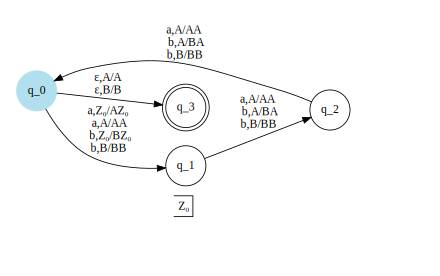

In [40]:
aibj3_four.save_img('aibj3_four')
aibj3_four.save_gif("aaaabb",filename="aibj3_four.gif",show=False)
aibj3_four.graph()